In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# Read the results.csv file
df = pd.read_csv('results.csv')

# Display the data
df.head()

,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes
0,19859602935,357188857,242987119,21277249728,13360,1060078919,3748146718,25420987,345592,3991171374,1
1,9829923745,263836414,375686623,10875845296,846327856,831078267,3449300310,32732413,391131,4647856225,2
2,7365790843,602896861,313913639,8155244682,539673125,653355937,3328160742,44188635,383193,3945769341,3
3,5269323212,336736585,390838390,5997337383,618908172,577787282,3282540163,52898516,745768,4205448114,4
4,4250211252,518132845,400610513,4880763375,586704980,488819825,3289958859,54140603,814718,4156787051,5


In [23]:
# Adding total elapsed time column
df['Total elapsed time'] = df['Communication'] + \
    df['Synchronization'] + df['Computation']

# Calculating metric
df['Metric'] = (df['Communication'] + df['Synchronization'])/df['Computation']

# Calculating speed up
# Getting the time where number of nodes = 1
seq_time = df[df['Number of nodes'] == 1]['Total elapsed time'].values[0]
df['Speedup'] = seq_time / df['Total elapsed time']


df.head()

,Map1,Map2,Shuffle2,Computation,Shuffle1,Reduce1,Split,Synchronization,Reduce2,Communication,Number of nodes,Total elapsed time,Metric,Speedup
0,19859602935,357188857,242987119,21277249728,13360,1060078919,3748146718,25420987,345592,3991171374,1,25293842089,0.188774,1.000000
1,9829923745,263836414,375686623,10875845296,846327856,831078267,3449300310,32732413,391131,4647856225,2,15556433934,0.430366,1.625941
2,7365790843,602896861,313913639,8155244682,539673125,653355937,3328160742,44188635,383193,3945769341,3,12145202658,0.489251,2.082620
3,5269323212,336736585,390838390,5997337383,618908172,577787282,3282540163,52898516,745768,4205448114,4,10255684013,0.710040,2.466324
4,4250211252,518132845,400610513,4880763375,586704980,488819825,3289958859,54140603,814718,4156787051,5,9091691029,0.862760,2.782083


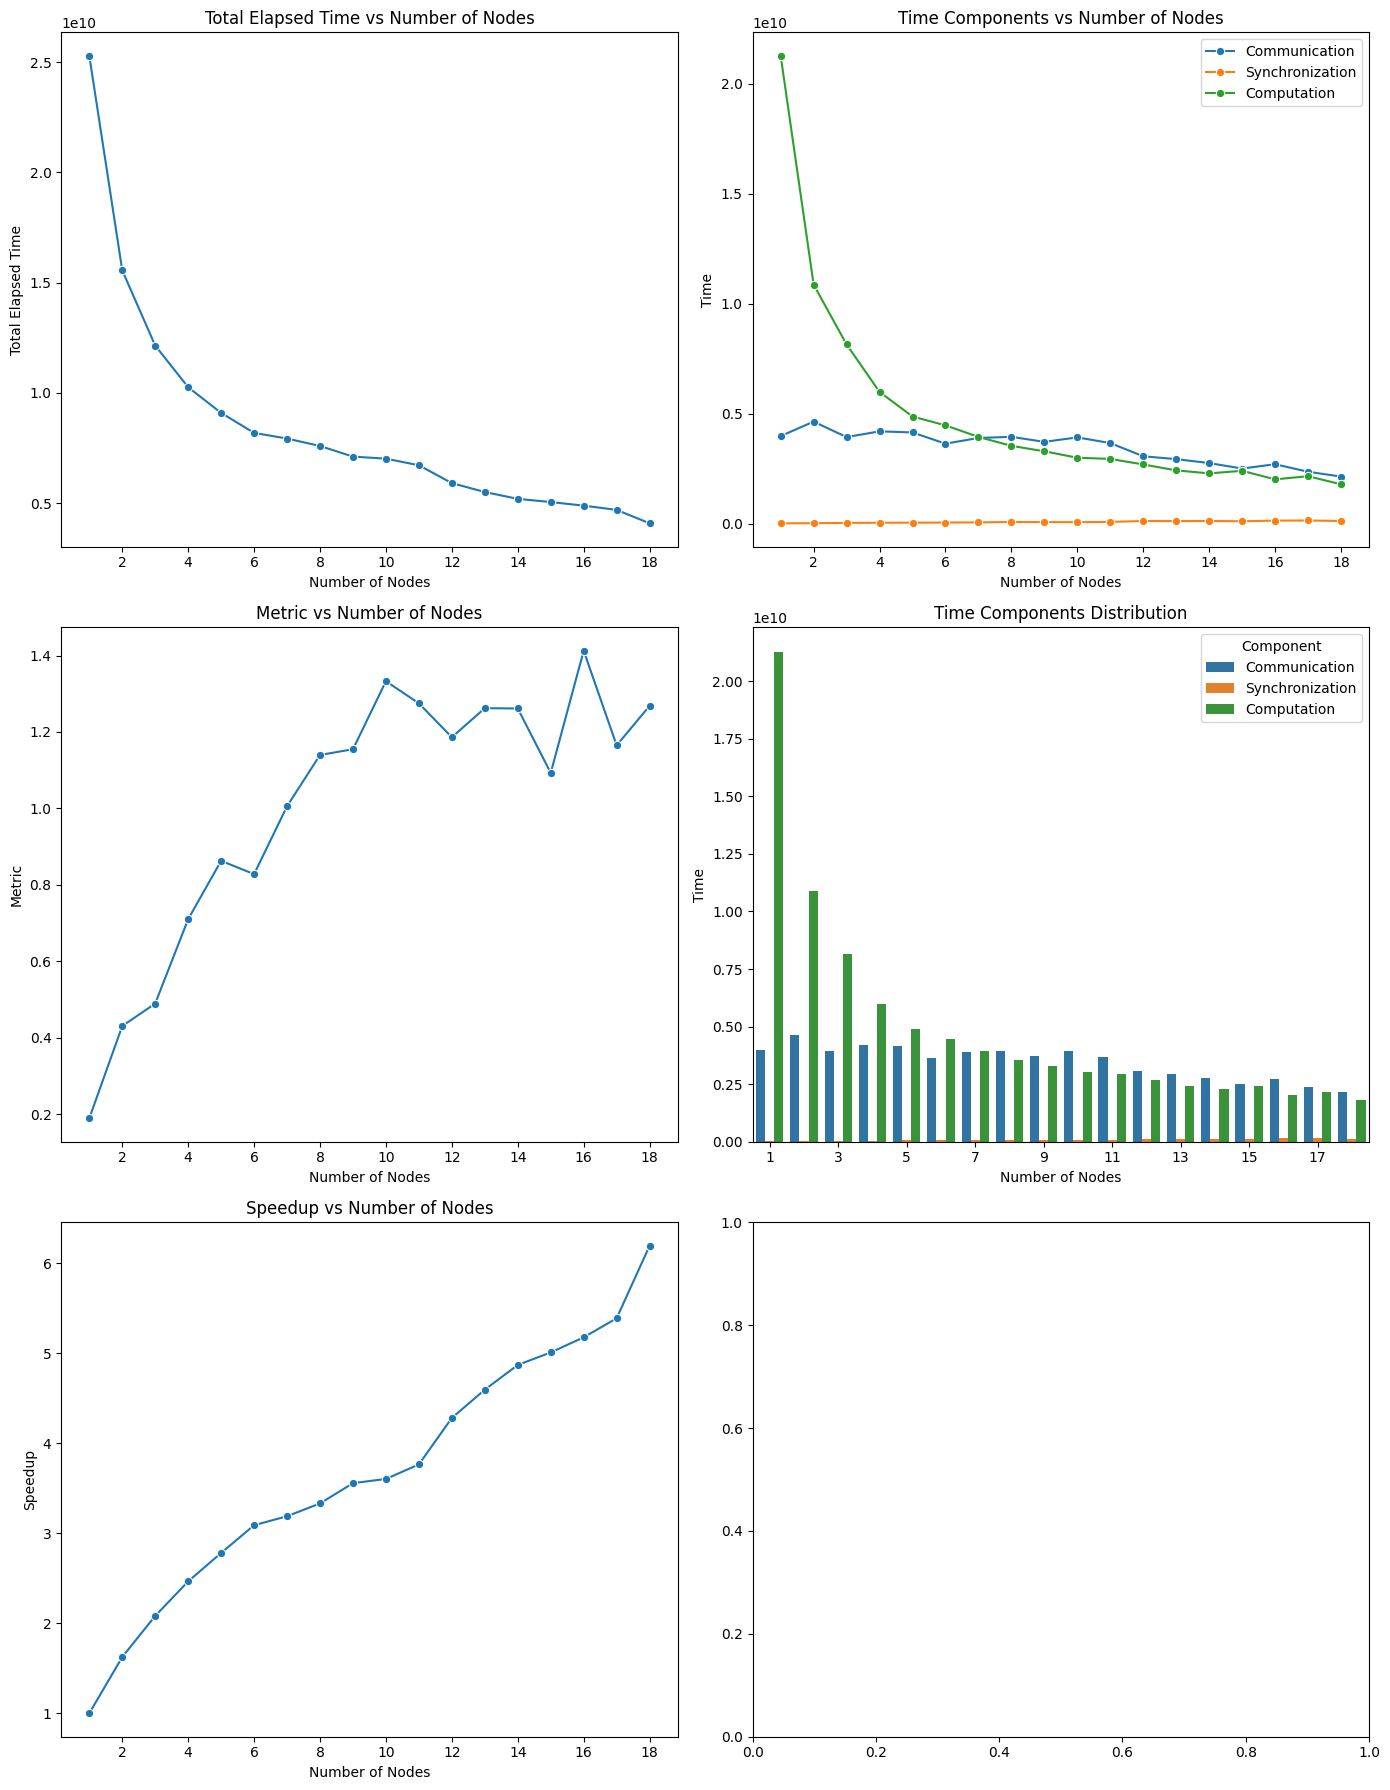

In [25]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Plot Total elapsed time vs Number of nodes
sns.lineplot(x='Number of nodes', y='Total elapsed time', marker='o', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Total Elapsed Time vs Number of Nodes')
axs[0, 0].set_xlabel('Number of Nodes')
axs[0, 0].set_ylabel('Total Elapsed Time')

# Plot Communication, Synchronization, and Computation times vs Number of nodes
sns.lineplot(x='Number of nodes', y='Communication', marker='o', data=df, ax=axs[0, 1], label='Communication')
sns.lineplot(x='Number of nodes', y='Synchronization', marker='o', data=df, ax=axs[0, 1], label='Synchronization')
sns.lineplot(x='Number of nodes', y='Computation', marker='o', data=df, ax=axs[0, 1], label='Computation')
axs[0, 1].set_title('Time Components vs Number of Nodes')
axs[0, 1].set_xlabel('Number of Nodes')
axs[0, 1].set_ylabel('Time')
axs[0, 1].legend()

# Plot Metric vs Number of nodes
sns.lineplot(x='Number of nodes', y='Metric', marker='o', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Metric vs Number of Nodes')
axs[1, 0].set_xlabel('Number of Nodes')
axs[1, 0].set_ylabel('Metric')

# Plot stacked bar chart for time components
df_melted = df.melt(id_vars='Number of nodes', value_vars=['Communication', 'Synchronization', 'Computation'],
          var_name='Component', value_name='Time')

sns.barplot(x='Number of nodes', y='Time', hue='Component', data=df_melted, ax=axs[1, 1])
axs[1, 1].set_title('Time Components Distribution')
axs[1, 1].set_xlabel('Number of Nodes')
axs[1, 1].set_ylabel('Time')

# Plot speed up chart 
sns.lineplot(x='Number of nodes', y='Speedup', marker='o', data=df, ax=axs[2, 0]) 
axs[2, 0].set_title('Speedup vs Number of Nodes')
axs[2, 0].set_xlabel('Number of Nodes')
axs[2, 0].set_ylabel('Speedup') 



# Adjust layout
plt.tight_layout()

# Convert X label to integer
axs[0, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[2, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))


# Show plots
plt.show()
